In [32]:
#Question 1(a)
import numpy as np
from scipy.misc import derivative
t=2.2
def v(t):
    v = 5*np.cos(10*t)+t**3-2*t**2-6*t+10
    return v
#print(v(t))
a=derivative(v,t,dx=1e-6,n=1)
#print(a)
CN=(t*a)/v(t)
print('Q1(a) Condition Number (C.N) of the function at t(=2.2s) =',CN)


Q1(a) Condition Number (C.N) of the function at t(=2.2s) = -0.04945432933056086


Q1(b)
acceleration(t=4s) = -11.2556580287304
acceleration(t=3s) = 58.4015812243877
acceleration(t=2s) = -47.6472625416946
acceleration(t=1s) = 20.2010555439003
acceleration(t=0s) = -5.99999999995049


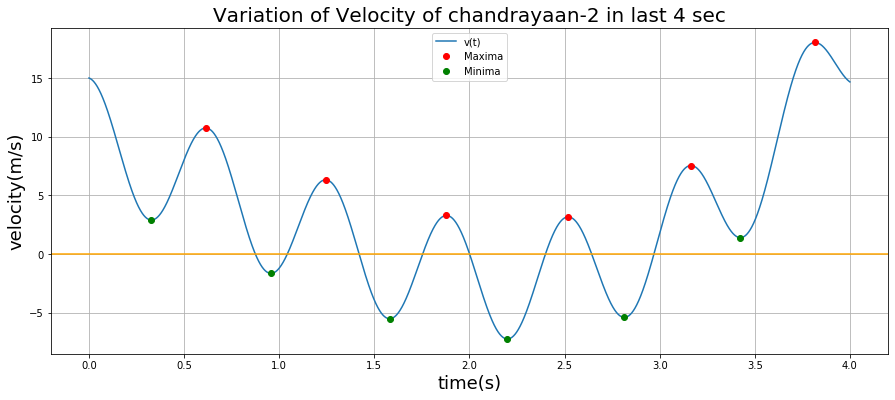

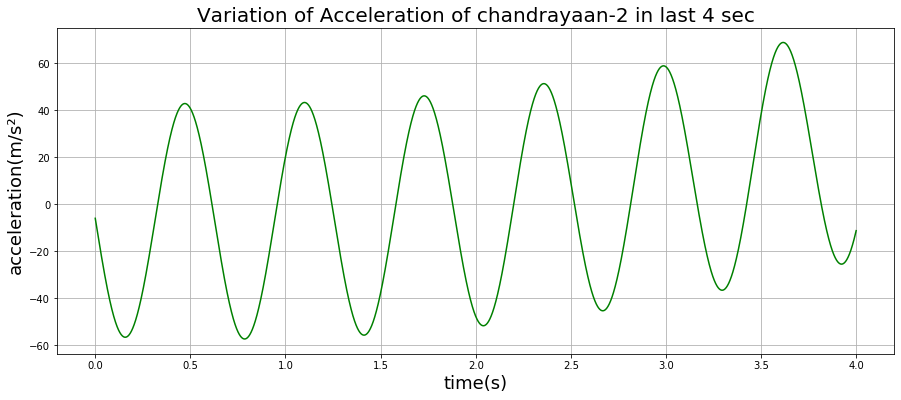

Local maxima values of velocity reached by chandrayaan-2 in last 4 sec
1 local maxima at time=0.613661366136614 &  Velocity = 10.7423519878018
2 local maxima at time=1.24412441244124 &  Velocity = 6.32618430400829
3 local maxima at time=1.87898789878988 &  Velocity = 3.2899271253835
4 local maxima at time=2.51905190519052 &  Velocity = 3.17105264694064
5 local maxima at time=3.16471647164716 &  Velocity = 7.5437547215242
6 local maxima at time=3.81638163816382 &  Velocity = 18.0266588893612


Local minima values of velocity reached by chandrayaan-2 in last 4 sec
1 local minima at time=0.328032803280328 &  Velocity = 2.89993191324612
2 local minima at time=0.956495649564956 &  Velocity = -1.6446145916122
3 local minima at time=1.58055805580558 &  Velocity = -5.50737907576389
4 local minima at time=2.1998199819982 &  Velocity = -7.23182514627558
5 local minima at time=2.81428142814281 &  Velocity = -5.39325190640812
6 local minima at time=3.42434243424342 &  Velocity = 1.40057517289542



In [35]:
#Question 1(b) Method 1------> Used Comparison to find Maxima & Minima of Velocity
import numpy as np
from scipy.misc import derivative

print('Q1(b)')
def vel(t):
    v = 5*np.cos(10*t)+t**3-2*t**2-6*t+10
    return v

for i in range(4,-1,-1):
    a=derivative(vel,i,dx=1e-6,n=1)
    print(f'acceleration(t={i}s) = {a:.15}')


t = np.linspace(0,4,10000)
v = 5*np.cos(10*t)+t**3-2*t**2-6*t+10
a=derivative(vel,t,dx=1e-6,n=1)

peaks = np.where((v[1:-1] > v[0:-2]) * (v[1:-1] > v[2:]))[0] + 1
dips = np.where((v[1:-1] < v[0:-2]) * (v[1:-1] < v[2:]))[0] + 1


plt.figure(figsize=(15,6))
plt.plot (t, v,label="v(t)")
plt.plot (t[peaks], v[peaks], 'ro',label="Maxima")
plt.plot (t[dips], v[dips], 'go',label="Minima")

plt.legend(loc='upper center')
plt.title("Variation of Velocity of chandrayaan-2 in last 4 sec",fontsize=20)
plt.xlabel("time(s)",fontsize=18)
plt.ylabel("velocity(m/s)",fontsize=18)
plt.axhline(0, color='orange')
plt.grid()

plt.figure(figsize=(15,6))
plt.plot(t,a,'g')
plt.title("Variation of Acceleration of chandrayaan-2 in last 4 sec",fontsize=20)
plt.xlabel("time(s)",fontsize=18)
plt.ylabel(f'acceleration(m/s\N{SUPERSCRIPT TWO})',fontsize=18)

plt.grid()
plt.show()


print('Local maxima values of velocity reached by chandrayaan-2 in last 4 sec')
for i in range(6):
    print(f'{i+1} local maxima at time={t[peaks][i]:.15g} &  Velocity = {v[peaks][i]:.15g}')
print('\n')
print('Local minima values of velocity reached by chandrayaan-2 in last 4 sec')
for i in range(6):
    print(f'{i+1} local minima at time={t[dips][i]:.15g} &  Velocity = {v[dips][i]:.15g}')
print('\n')    
print(f'Global minima in Velocity = {v[dips].min():.15g}')


Q1(b)
acceleration(t=4s) = -11.2556580287304
acceleration(t=3s) = 58.4015812243877
acceleration(t=2s) = -47.6472625416946
acceleration(t=1s) = 20.2010555439003
acceleration(t=0s) = -5.99999999995049


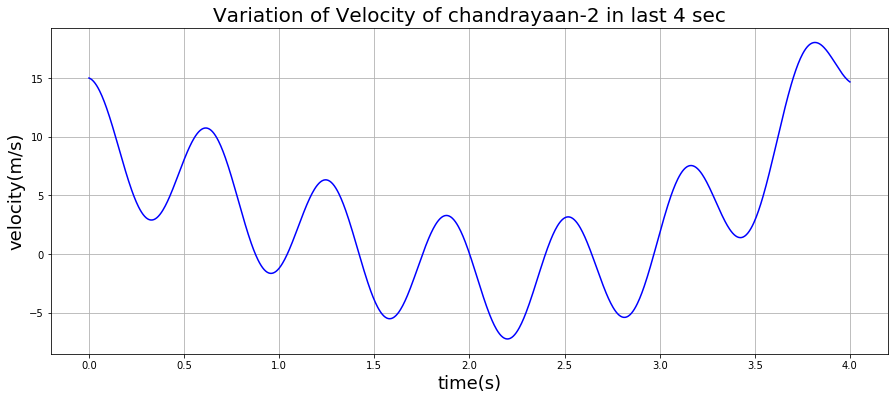

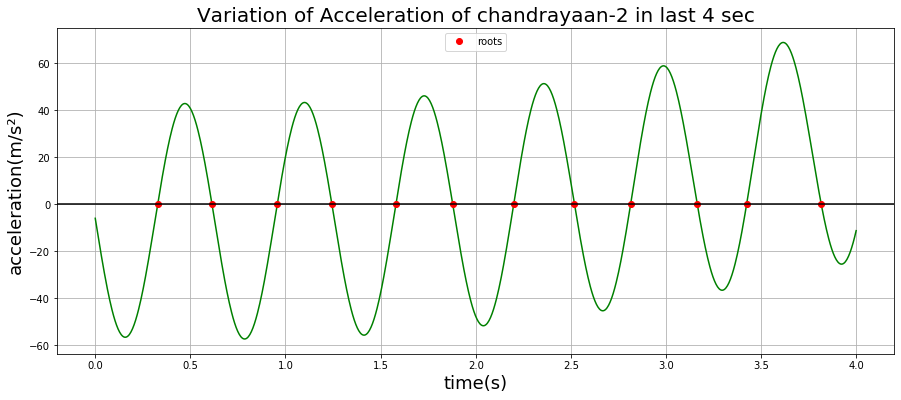

local minima at t=0.328184445958932 & v=2.89992624375906
local minima at t=0.956687561430064 & v=-1.64462373925192
local minima at t=1.58046786877983 & v=-5.50738112194616
local minima at t=2.19968073440191 & v=-7.23183008283491
local minima at t=2.81438686292252 & v=-5.39325473340963
local minima at t=3.42427494436391 & v=1.40057405236137


local maxima at t=0.613615836730971 & v=10.7423525007898
local maxima at t=1.24393570845818 & v=6.32619307357995
local maxima at t=1.87910563895484 & v=3.28993053464364
local maxima at t=2.51920225644424 & v=3.17105816292605
local maxima at t=3.16456445296098 & v=7.54376017332763
local maxima at t=3.81643033932673 & v=18.026659396934


Global minima in Velocity = -7.23183008283491


In [13]:
#Question 1(b) Method 2------->Used Fsolve & Second derivative to find Maxima & Minima of Velocity
print('Q1(b)')
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve
from scipy.misc import derivative
%matplotlib inline

def vel_f(t):
    v = 5*np.cos(10*t)+t**3-2*t**2-6*t+10
    return v

def acc_f(t):
    a=derivative(vel_f,t,dx=1e-6,n=1)
    return a

def vsd_f(t):
    vsd=derivative(vel_f,t,dx=1e-6,n=2)
    return vsd
    
for t in range(4,-1,-1):
    print(f'acceleration(t={t}s) = {acc_f(t):.15}')

t = np.linspace(0,4,1000)
vel_f(t)
#v1=[vel_f(i) for i in t ]
plt.figure(figsize=(15,6))
plt.plot(t,vel_f(t),'b')
#plt.plot(t,v1,'b')

plt.title("Variation of Velocity of chandrayaan-2 in last 4 sec",fontsize=20)
plt.xlabel("time(s)",fontsize=18)
plt.ylabel("velocity(m/s)",fontsize=18)
plt.grid()

x = np.linspace(0.2,3.8,12)
a_roots = [fsolve(acc_f ,x)]
    
acc_val_aroots=[acc_f(a_roots[0][i]) for i in range(12)]
#for i in range(12):
    #print(f'{a_roots[0][i]},\t {acc_val_aroots[i]}')

plt.figure(figsize=(15,6))
plt.plot(t,acc_f(t),'g')
plt.plot(a_roots[0],acc_f(a_roots[0]),'ro',label="roots")
plt.legend(loc='upper center')
plt.title("Variation of Acceleration of chandrayaan-2 in last 4 sec",fontsize=20)
plt.xlabel("time(s)",fontsize=18)
plt.ylabel(f'acceleration(m/s\N{SUPERSCRIPT TWO})',fontsize=18)
plt.axhline(0, color='black')
plt.grid()
plt.show()


vsd_at_aroots=[vsd_f(a_roots[0][i]) for i in range(12)]
#print(vsd_at_aroots)

for i in range(12):
    if(vsd_at_aroots[i]>0):
        print( f'local minima at t={a_roots[0][i]:.15g} & v={vel_f(a_roots[0][i]):.15g}')
print('\n')        
for i in range(12):
    if(vsd_at_aroots[i]<0):
        print(f'local maxima at t={a_roots[0][i]:.15g} & v={vel_f(a_roots[0][i]):.15g}')  
        
print('\n')
print(f'Global minima in Velocity = {vel_f(a_roots[0]).min():.15g}')

In [14]:
#Question 1(c)
print('Q1(c)')
import numpy as np
from scipy.misc import derivative
t=2.1996807344019076
h=0.2

def vel_f(t):
    v = 5*np.cos(10*t)+t**3-2*t**2-6*t+10
    return v

def acc_f(t):
    a=derivative(vel_f,t,dx=1e-6,n=1)
    return a

def Ffdda_f(t):
    af=((vel_f(t+h)-vel_f(t))/h)
    return af

def Bfdda_f(t):
    ab=((vel_f(t)-vel_f(t-h))/h)
    return ab

def Cfdda_f(t):
    ac=((vel_f(t+h)-vel_f(t-h))/2*h)
    return ac



print(f'Global minima at time={t:.15g}')
print(f'Using Scipy derivative,acc at global minima={acc_f(t):.15g}')
print(f'Using forward "finite-divided difference approximation",acc at global minima={Ffdda_f(t):.15g}')
print(f'Using backward "backward-divided difference approximation",acc at global minima={Bfdda_f(t):.15g}')
print(f'Using centered "centered-finite divided difference approximation",acc at global minima={Cfdda_f(t):.15g}')


Q1(c)
Global minima at time=2.19968073440191
Using Scipy derivative,acc at global minima=-3.5527136788005e-09
Using forward "finite-divided difference approximation",acc at global minima=36.2086124891186
Using backward "backward-divided difference approximation",acc at global minima=-36.4372125380438
Using centered "centered-finite divided difference approximation",acc at global minima=-0.00457200097850397


Q1(d)
Global minima at t = 2.1996807344019076
acceleration at global minima = -3.552713678800501e-09



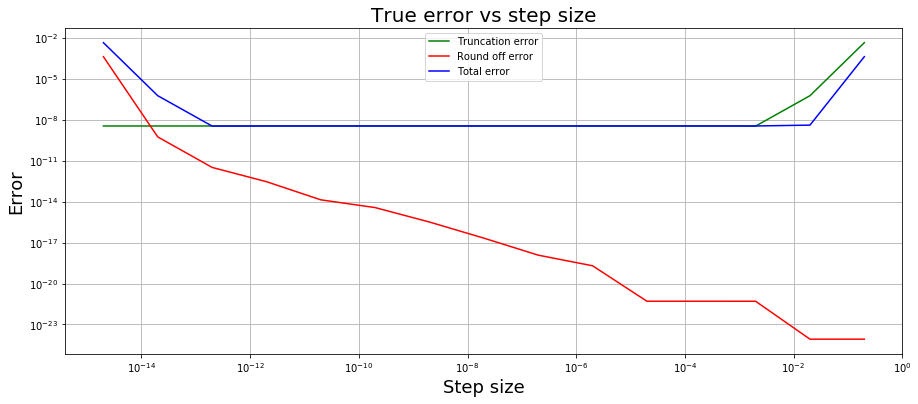

Points of diminising return (2e-14,3.552713678800501e-09)


In [2]:
#Question 1(d)
print('Q1(d)')
import numpy as np
import math as m
from scipy.misc import derivative
import matplotlib.pyplot as plt
%matplotlib inline

t=2.1996807344019076

def vel_f(t):
    v = 5*np.cos(10*t)+t**3-2*t**2-6*t+10
    return v

def acc_f(t):
    a=derivative(vel_f,t,dx=1e-6,n=1)
    return a

at=acc_f(t)
print('Global minima at t =',t)
print('acceleration at global minima =',at)

def Cfdda_f(h):
    ac=((vel_f(t+h)-vel_f(t-h))/2*h)
    return ac

def Terr_f(h):
    terr=abs((at-Cfdda_f(h)))
    return terr

def Rerr_f(h,k):
    rerr=[abs(Terr_f(h)[j-1]-round_to_n(Terr_f(h)[j-1],j-1)) for j in k]
    return rerr

def Toerr_f(h,k):
    toerr=[Terr_f(h)[j-1]+Rerr_f(h,k)[j-1] for j in k]
    return toerr

def round_to_n(x, n):
    fmt = "%%.%de" % (n)
    return float(fmt % x)


i=np.linspace(1,15,15)
h=2*10**(-i)
k=np.arange(15,0,-1)
print()

plt.figure(figsize=(15,6))
plt.loglog(h,Terr_f(h),'g',label="Truncation error")
plt.loglog(h,Rerr_f(h,k),'r',label="Round off error")
plt.loglog(h,Toerr_f(h,k),'b',label="Total error")

plt.legend(loc='upper center')
plt.title("True error vs step size",fontsize=20)
plt.ylabel("Error",fontsize=18)
plt.xlabel("Step size",fontsize=18)
plt.grid()
plt.show()

print(f'Points of diminising return ({h[13]},{Terr_f(h)[13]})')